## Notebook 6: Sistemas de equações lineares

Neste Notebook, vamos aprender a construir e a resolver sistemas de equações lineares e a aplicar estas técnicas para resolver problemas práticos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Construir e resolver um sistema de equações lineares
Uma parábola é definida por três pontos (partindo do princípio de que não se encontram numa linha reta). A equação de uma parábola é $y=ax^2+bx+c$, onde $a$, $b$, e $c$ são constantes.
Dados três pontos $(x_1,y_1)$, $(x_2,y_2)$, $(x_3,y_3)$, poderá ser compilado o seguinte sistema de três equações lineares:

$$
\begin{split}
x_1^2a+x_1b+c&=y_1 \\
x_2^2a+x_2b+c&=y_2 \\
x_3^2a+x_3b+c&=y_3 \\
\end{split}
$$

Ou na forma de matriz:

$$\left(
\begin{array}{ccc}
x_1^2 & x_1 & 1 \\
x_2^2 & x_2 & 1 \\
x_3^2 & x_3 & 1 \\
\end{array}
\right)
\left(
\begin{array}{c}
a \\b \\c \\
\end{array}
\right)
=
\left(
\begin{array}{c}
y_1 \\
y_2 \\
y_3 \\
\end{array}
\right)$$

Para resolver este problema, construímos um array de 2 dimensões que contém a matriz (chamado `A`) e um array de 1 dimensão que contém o lado direito (chamado `rhs`).
Vamos fazê-lo para os três pontos $(x_1,y_1)=(-2,2)$, $(x_2,y_2)=(1,-1)$, $(x_3,y_3)=(4,4)$.

In [2]:
xp = np.array([-2, 1, 4])
yp = np.array([2, -1, 4])
A = np.zeros((3, 3))
rhs = np.zeros(3)
for i in range(3):
    A[i] = xp[i] ** 2, xp[i], 1  # Armazena uma linha de cada vez
    rhs[i] = yp[i]
print('Array A:')
print(A)
print('rhs:',rhs)

Array A:
[[  4.  -2.   1.]
 [  1.   1.   1.]
 [ 16.   4.   1.]]
rhs: [ 2. -1.  4.]


O sistema poderá ser resolvido através do método `solve`, que faz parte do subpacote `linalg` do `numpy`. O método `solve` assume como entrada um array de 2 dimensões (a matriz) e um array de 1 dimensão (o lado direito), e devolve a solução. Para confirmar se a solução está correta, temos de fazer uma multiplicação de matrizes armazenada no array `A` com a solução obtida, à qual chamamos `sol`. Como sabemos, a linha

`A * sol`

faz uma multiplicação termo a termo. Para uma multiplicação de matrizes, tem de ser utilizado o símbolo `@` (em alternativa, a função `np.dot` pode ser utilizada; o símbolo `@` não funciona em Python 2).

In [3]:
sol = np.linalg.solve(A, rhs)
print('a solução é:', sol)
print('valores particulares de y:', yp)
print('A @ sol:', A @ sol)

a solução é: [ 0.44444444 -0.55555556 -0.88888889]
valores particulares de y: [ 2 -1  4]
A @ sol: [ 2. -1.  4.]


Também podemos verificar visualmente se resolvemos o problema de forma correta, desenhando os três pontos e a parábola.

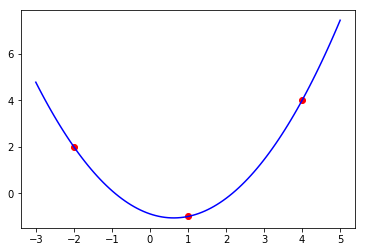

In [4]:
plt.plot(xp, yp, 'ro')
x = np.linspace(-3, 5, 100)
y = sol[0] * x ** 2 + sol[1] * x + sol[2]
plt.plot(x, y, 'b');

### <a name="back1"></a>Exercício 1. Criar uma onda
Considere as seguintes quatro medidas de quantidade $y$ no tempo $t$: $(t_0,y_0)=(0,3)$, $(t_1,y_1)=(0.25,1)$, $(t_2,y_2)=(0.5,-3)$, $(t_3,y_3)=(0.75,1)$. As medidas fazem parte de uma onda que poderá ser escrita como:

$y = a\cos(\pi t) + b\cos(2\pi t) + c\cos(3\pi t) + d\cos(4\pi t)$

em que $a$, $b$, $c$, e $d$ são parâmetros. Construa um sistema de quatro equações lineares e resolva para os quatro parâmetros. Crie uma representação gráfica da onda para valores de $t$ entre 0 e 1, e apresente as quatro medidas com pontos.

<a href="#ex1answer">Soluções do Exercício 1</a>

### Criar um polinómio arbitrário
Nos três exercícios seguintes, vamos criar um polinómio de grau arbitrário $N$ para um conjunto de $N+1$ pontos de dados. A função que vamos criar é:
$$f(x) = a_0 + a_1x + a_2x^2 + ... + a_Nx^N =\sum\limits_{n=0}^{N}a_nx^n$$

Repare que temos $N+1$ parâmetros $a_n$, enquanto o grau do polinómio é chamado $N$.

### <a name="back2"></a>Exercício 2. A função `fpoly`
Para começar, escreva uma função chamada `fpoly` que devolva um array em que o elemento $n$ seja igual a $x^n$. Os argumentos de entrada da função são o valor de $x$ e o grau do polinómio $N$. O resultado da função é um array de comprimento $N+1$. Teste a sua função para $x=2$ e $N=4$ ao executar:

`print fpoly(2, 4)`

que deve devolver `[  1.   2.   4.   8.  16.]`.

<a href="#ex2answer">Soluções do Exercício 2</a>

### <a name="back3"></a>Exercício 3. A função `solvepoly`
Em seguida, escreva uma função que calcule os parâmetros $a_n$ para criar um polinómio de grau $N$ com os $N+1$ pontos de dados. A função deverá chamar-se `solvepoly`. Os argumentos de entrada da função são um array $x$ de comprimento $N+1$ e um array $y$ de comprimento $N+1$. O resultado é um array com os parâmetros $a_n$, de modo a que um polinómio de grau $N$ passe exatamente pelos $N+1$ pontos de dados $x$ e $y$. Dentro da função, tem de calcular uma matriz de $N+1$ equações para os $N+1$ parâmetros incógnitos. Para cada uma das linhas da matriz, execute a função `fpoly`. Teste a sua função ao executar os quatro comandos seguintes. Se o código estiver correto, o array do parâmetro `a` é [ 3.          2.33333333 -6.          1.66666667].

    xp = np.array([0, 1, 2, 3])
    yp = np.array([3, 1, -3, 1])
    a = solvepoly(xp, yp)
    print(a)

<a href="#ex3answer">Soluções do Exercício 3</a>

### <a name="back4"></a>Exercício 4. A função `fpolyeval`
Por último, escreva uma função chamada `fpolyeval` para avaliar a função $ f(x) = \sum \limits_{n=0}^{N}a_nx^n $ para os parâmetros dados de $a$ e um array de valores $x$. A função `fpolyeval` tem como argumento de entrada um array $x$ de comprimento arbitrário e um array de parâmetros $a$ de comprimento $N+1$. A função devolve um array de valores $f(x)$ com um comprimento igual ao comprimento de $x$. Em primeiro lugar, teste a função ao executar:

`fpolyeval(xp, a)`

em que `xp` é o array de valores inseridos no Exercício 3 e `a` são os parâmetros calculados no Exercício 3. Se tiver programado tudo corretamente, a função deverá devolver os quatro valores de `yp` especificados no Exercício 3. Teste novamente a sua função ao executar os seguintes comandos, que devem representar graficamente os quatro pontos de dados do Exercício 3 como marcadores e o polinómio de grau 3 que passa exatamente pelos quatro pontos.

    x = np.linspace(-1,4,100)
    y = fpolyeval(x, a)
    plt.plot(xp, yp, 'ko', label='data')
    plt.plot(x, y, label='fitted poly')
    plt.legend(loc='best');

<a href="#ex4answer">Soluções do Exercício 4</a>

### Águas subterrâneas unidimensionais
Considere uma camada arenosa coberta por uma camada argilosa. A camada arenosa está delimitada em cada lado por um canal com um nível de água fixo de $h_1^*$ (esquerda) e de $h_2^*$ (direita); a distância entre os dois canais é $L$. Existem fugas de água pela camada argilosa a uma taxa constante $P$ (ver Figura). A cabeça da água subterrânea na camada arenosa é regida pela equação diferencial ordinária de segunda ordem:

$$\frac{\text{d}^2h}{\text{d}x^2} = -\frac{P}{kD}$$

em que $h$ é a cabeça (*head* em inglês), $k$ é a condutividade hidráulica da camada arenosa e $D$ é a espessura da camada arenosa. As condições de contorno são $h=h_1^*$ em $x=0$ e $h=h_2^*$ em $x=L$. 

<img src="http://i.imgur.com/2DH0sxT.png" alt="Consolidation" width="400px">

Embora seja fácil resolver este problema, vamos resolvê-lo numericamente através do método das diferenças finitas (o que permite que $P$ seja uma função de $x$, por exemplo). A cabeça é calculada a $N+1$ pontos uniformemente espaçados, de $x=0$ a $x=L$. Os pontos são marcados de $x_0$ a $x_{N}$, em que $x_n=n\Delta x$, e $\Delta x$ é a distância horizontal entre os pontos. A cabeça no ponto $x_n$ é chamada $h_n$. A derivada de segunda ordem pode ser estimada como (consulte, p. ex., Verrujt (2012) Soil Mechanics, Eq. 17.4; pode encontrar uma ligação para um PDF com o texto completo do livro em Software [aqui](http://geo.verruijt.net/).

$$\frac{\text{d}^2h}{\text{d}x^2} \approx \frac{1}{\Delta x} \left[ \frac{h_{n+1}-h_n}{\Delta x} - \frac{h_{n}-h_{n-1}}{\Delta x} \right]= \frac{h_{n-1}-2h_n+h_{n+1}}{(\Delta x)^2}$$

A substituição desta estimativa da derivada na equação diferencial e a reorganização dos termos resulta em:

$$h_{n-1}-2h_n+h_{n+1} = -P\frac{(\Delta x)^2}{kD}$$

Pode ser escrita uma equação como esta para cada ponto $n$, exceto para o primeiro e o último pontos, em que temos de aplicar as condições de contorno:

$$h_0=h_1^* \qquad h_N=h_2^*$$

Quando $N=4$, temos de resolver um sistema de $N+1=5$ equações lineares nas incógnitas $h_0$ a $h_4$:

$$\begin{split}
h_0 &= h_1^*  \\
h_{0}-2h_1+h_{2} &= -P(\Delta x)^2/(kD) \\
h_{1}-2h_2+h_{3} &= -P(\Delta x)^2/(kD) \\
h_{2}-2h_3+h_{4} &= -P(\Delta x)^2/(kD) \\
h_4 &= h_2^* 
\end{split}$$

ou na forma de matriz:

$$\left(
\begin{array}{ccccc}
1 & 0 & 0 & 0 & 0 \\
1 & -2 & 1 & 0 & 0 \\
0 & 1 & -2 & 1 & 0 \\
0 & 0 & 1 & -2 & 1 \\
0 & 0 & 0 & 0 & 1 \\
\end{array}
\right)
\left(
\begin{array}{c}
h_0 \\
h_1 \\
h_2 \\
h_3 \\
h_4 \\
\end{array}
\right)
=
\left(
\begin{array}{c}
h_1^* \\
-P(\Delta x)^2/(kD) \\
-P(\Delta x)^2/(kD) \\
-P(\Delta x)^2/(kD) \\
h_2^* \\
\end{array}
\right)$$

Note que a matriz é maioritariamente composta por zeros. A matriz é referida como uma matriz tridiagonal, pois existem apenas valores ao longo de três diagonais da matriz. A matriz poderá ser construída ao especificar os valores e as posições das diagonais. A diagonal principal tem a posição número zero e o comprimento $N+1$. A diagonal exatamente acima da diagonal principal tem a posição número +1 e o comprimento $N$, enquanto a diagonal abaixo da diagonal principal tem a posição número −1 e também o comprimento $N$. A função `np.diag` cria uma matriz composta por uma diagonal. Os argumentos de entrada são um array do comprimento correto com os valores ao longo da diagonal e a posição da diagonal. A matriz pode ser construída da seguinte forma:

In [5]:
N = 4
d0 = -2 * np.ones(N + 1)  # diagonal principal
d0[0] = 1  # o primeiro valor da diagonal principal é 1
d0[-1] = 1 # o último valor da diagonal principal é 1
dplus1 = np.ones(N) # diagonal imediatamente acima da diagonal principal, posição 1
dplus1[0] = 0    # o primeiro valor da diagonal é 0
dmin1 = np.ones(N)  # diagonal imediatamente abaixo da diagonal principal, posição -1
dmin1[-1] = 0    # o último valor da diagonal é 0
A = np.diag(d0, 0) + np.diag(dplus1, 1) + np.diag(dmin1, -1)
print(A)

[[ 1.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  1.]]


Note que o método das diferenças finitas descrito acima é preciso quando usa um número razoável de pontos. Quatro pontos não chegam. Poderá descobrir se utilizou pontos suficientes ao, por exemplo, duplicar o número de pontos e comparar as duas soluções.

### <a name="back5"></a>Exercício 5. A cabeça entre dois canais
Calcule a distribuição da cabeça numa camada arenosa delimitada de cada lado por um canal. Dado que: $k=10$ m/dia, $D=10$ m, $h_1^*=20$ m, $h_2^*=22$ m, $L=1000$ m, $P=0.001$ m/d. Use $N=40$. Escreva o código Python para:

* Resolver as cabeças em todos os $N+1$ pontos
* Apresentar o valor máximo da cabeça entre os dois canais no ecrã (deve ser cerca de 22,5) 
* Criar uma representação gráfica da cabeça vs. $x$. Identique os eixos.

<a href="#ex5answer">Soluções do Exercício 5</a>

### Consolidação
A deformação dos solos de argila saturados é um processo lento designado consolidação. Na compressão de um solo, a porosidade diminui e, como resultado, existe menos espaço disponível para água capilar. Assim, alguma água capilar tem de ser empurrada para fora do solo durante a compressão. Isto pode demorar algum tempo em argila, pois a sua permeabilidade é reduzida. Pode ser encontrada uma descrição extensa do processo de consolidação, por ex., nos Capítulos 15-17 de Verruijt, 2012, Soil Mechanics, disponível neste [link](http://geo.verruijt.net/).

Considere uma consolidação unidimensional num solo com uma altura de $h$. A pressão da água $p$ existente na amostra de solo é regida pela equação diferencial:

$$\frac{\partial p}{\partial t} = c_v \frac{\partial^2 p}{\partial z^2}$$

em que $z$ é a coordenada vertical (ascendente positivo) e $c_v$ é o coeficiente de consolidação. Consideramos o problema em que a água pode ser drenada pela camada superior, mas não pela camada inferior, pelo que a condição de contorno na camada inferior é:

$$z=0 \qquad \frac{\partial p}{\partial z} = 0$$

e a condição de contorno na camada superior é:

$$z=h \qquad p = 0$$

É aplicada uma carga constante na camada superior no tempo $t=0$ resultando, inicialmente, numa pressão uniforme $q$ em toda a amostra de solo (exceto em $z=0$, em que a pressão é sempre zero).

$$t=0 \qquad p = q$$

<img src="http://i.imgur.com/4xdeoxw.png" alt="Consolidation" width="400px">

A mudança de pressão ao longo do tempo no solo é simulada através de um método numérico (o das diferenças finitas totalmente implícitas, para ser exato). A pressão é calculada a $N+1$ pontos, uniformemente distribuídos de $z=0$ a $z=h$. Os pontos são marcados de $z_0$ a $z_{N}$, em que $z_n=n\Delta z$, e $\Delta z$ é a distância vertical entre os pontos. A pressão no ponto $z_n$ é chamada $p_n$. É calculada uma solução separada para cada intervalo de tempo $\Delta t$. A derivada temporal é estimada como:

$$\frac{\partial p}{\partial t} \approx \frac{p_n(t) - p_n(t-\Delta t)}{\Delta t}$$

enquanto a derivada espacial é estimada como:

$$\frac{\partial^2 p}{\partial z^2} \approx \frac{p_{n-1}(t) -2p_n(t) + p_{n+1}(t)}{\Delta z)^2} $$

A substituição das estimativas destas derivadas e a junção de termos resulta na seguinte operação:

$$p_{n-1}(t) - (2+\mu)p_n(t) + p_{n+1}(t) = -\mu p_n(t-\Delta t)$$

onde

$$\mu = (\Delta z)^2/(c_v\Delta t)$$

Esta é uma equação para a pressão nos pontos $(n−1)$, $n$ e $(n+1)$ no tempo $t$, em que se presume que a pressão no tempo $t-\Delta t$ é conhecida.

As equações para $n=0$ e $n=N$ são diferentes. 

Na camada inferior da amostra ($n=0$), a condição de contorno é $\partial p/\partial z = 0$. A derivada poderá ser estimada a $z_0=0$ como:

$$\left(\frac{\partial p}{\partial z}\right)_{z=0} \approx (p_1-p_{-1})/(2\Delta z)=0$$

em que $p_{-1}$ é a pressão num ponto imaginário $\Delta z$ abaixo de $z_0$. A derivada é zero quando $p_{-1}=p_1$ e a substituição na equação para $n=0$ resulta em:

$$- (2+\mu)p_n(t) + 2p_{n+1}(t) = -\mu p_n(t-\Delta t)$$

A equação para $n=N$ é mais simples, pois, na camada superior da amostra ($n=N$), a pressão está fixada em $p_N=0$.

A título de exemplo, o sistema de equações para $N=4$ é:

$$\left(
\begin{array}{ccccc}
-(2+\mu) & 2 & 0 & 0 & 0 \\
1 & -(2+\mu) & 1 & 0 & 0 \\
0 & 1 & -(2+\mu) & 1 & 0 \\
0 & 0 & 1 & -(2+\mu) & 1 \\
0 & 0 & 0 & 0 & 1 \\
\end{array}
\right)
\left(
\begin{array}{c}
p_0(t) \\
p_1(t) \\
p_2(t) \\
p_3(t) \\
p_4(t) \\
\end{array}
\right)
=
\left(
\begin{array}{c}
-\mu p_0(t-\Delta t)) \\
-\mu p_1(t-\Delta t)) \\
-\mu p_2(t-\Delta t)) \\
-\mu p_3(t-\Delta t) \\
0 \\
\end{array}
\right)$$

A solução é obtida graças aos intervalos de tempo. A matriz tem de ser calculada apenas uma vez, pois não muda ao longo do tempo. A cada intervalo de tempo, tem de ser calculado um novo lado direito e um sistema linear de $N+1$
equações tem de ser resolvido. Se a matriz é chamada $A$ e o lado direito (com base nas pressões a $t-\Delta t$) é chamado $\vec{r}(t-\Delta t)$ a pressão no tempo $t$, $\vec{p}(t)$ é obtida ao resolver o sistema:

$$A\vec{p}(t) = \vec{r}(t-\Delta t)$$

Repare novamente que o procedimento de solução numérica apresentado é estimado e apenas resulta em soluções precisas quando o intervalo de tempo $\Delta t$ e a discretização espacial $\Delta z$ são pequenos o suficiente.

### <a name="back6"></a>Exercício 6. Consolidação unidimensional
Considere o processo de consolidação de uma camada argilosa com 2 m de espessura. É aplicada uma carga uniforme ao tempo $t=0$ provocando um aumento unitário na pressão, i.e., $p(t=0)=1$. O coeficiente de consolidação da argila é $c_v=1\cdot 10^{-6}$ $m^2/s$. Simule o processo de consolidação utilizando o método numérico descrito acima. Utilize $N=40$ e um intervalo de tempo de $\Delta t=4\cdot 10^4$ seg. Assuma 50 intervalos de tempo e represente graficamente a distribuição da pressão na argila a cada 10 intervalos de tempo. Adicione etiquetas aos eixos e uma legenda. Compare a sua solução com a do gráfico da Fig. 16.2 de Veruit (2012). (Note que Verruijt representa graficamente o valor de $p$ no eixo horizontal.) A última linha da sua representação gráfica deve estimar a linha $c_v t / h^2=0.5$ no gráfico de Verrujt.

Certifique-se de que o seu código Python:

* Resolve para a pressão em todos os $N+1$ pontos, para todos os 50 intervalos de tempo, e representa graficamente os resultados após 10, 20, 30, 40 e 50 intervalos de tempo.
* Apresenta o valor máximo da pressão no ecrã após 10, 20, 30, 40 e 50 intervalos de tempo.

<a href="#ex6answer">Soluções do Exercício 6</a>

### A inversa de uma matriz
Conforme indicado, os valores da matriz `A` não variam ao longo do tempo. Assim, é mais eficiente calcular e armazenar a inversa da matriz em vez de executar repetidamente o método `np.linalg.solve`. A inversa de uma matriz pode ser calculada através da função `inv` do pacote `linalg`. Se a inversa da matriz `A` se chamar `Ainv`, a solução para a pressão poderá ser obtida através da multiplicação de matrizes de `Ainv` com o lado direito. Por exemplo, para o primeiro problema neste Notebook, criar uma parábola com três pontos, a inversa da matriz pode ser calculada para obter uma solução da seguinte forma:

In [6]:
A = np.array([[ 4, -2, 1],
              [ 1,  1, 1],
              [16,  4, 1]])
rhs = np.array([2,-1, 4])
Ainv = np.linalg.inv(A)
sol = Ainv @ rhs
print('sol:', sol)

sol: [ 0.44444444 -0.55555556 -0.88888889]


### <a name="back7"></a>Exercício 7. Continuação da consolidação unidimensional
Modifique a sua resposta para o Exercício 6 ao calcular e armazenar a inversa da matriz e calcule uma solução através da multiplicação da inversa da matriz com o vetor do lado direito.

<a href="#ex7answer">Soluções do Exercício 7</a>

### Matrizes esparsas
O procedimento utilizado até agora para construir a matriz para uma solução das diferenças finitas não é muito eficiente, pois é criada uma matriz completa, composta maioritariamente por zeros. Os valores diferentes de zero surgem apenas em três diagonais. Há rotinas mais eficientes que armazenam o que se designa por *matrizes esparsas*. Numa matriz esparsa, apenas são armazenados o valor e a localização de valores diferentes de zero numa matriz. A funcionalidade das matrizes esparsas está disponível no pacote `scipy.sparse`. Pode ser criada uma matriz esparsa a partir de diagonais com a função `diags`, a qual utiliza uma lista de arrays para as diagonais e uma lista dos números das diagonais. Por exemplo, a matriz:

$$\left(
\begin{array}{cccc}
2 & 3 & 0 & 0 \\
1 & 2 & 3 & 0 \\
0 & 1 & 2 & 3 \\
0 & 0 & 1 & 2 \\
\end{array}
\right)$$
é criada como:

In [7]:
import scipy.sparse as sp
A = sp.diags([1 * np.ones(3), 
              2 * np.ones(4), 
              3 * np.ones(3)], 
             [-1, 0, 1], format='csc')
print('Matriz esparsa A')
print(A) # Indica a forma como A é armazenada: linha, coluna, valor
print('Matriz completa A como um array')
print(A.toarray())  # Devolve o array equivalente completo

Matriz esparsa A
  (1, 0)	1.0
  (0, 0)	2.0
  (2, 1)	1.0
  (1, 1)	2.0
  (0, 1)	3.0
  (3, 2)	1.0
  (2, 2)	2.0
  (1, 2)	3.0
  (3, 3)	2.0
  (2, 3)	3.0
Matriz completa A como um array
[[ 2.  3.  0.  0.]
 [ 1.  2.  3.  0.]
 [ 0.  1.  2.  3.]
 [ 0.  0.  1.  2.]]


Há várias formas de armazenar uma matriz esparsa. No código acima, a matriz esparsa `A` é armazenada numa *coluna esparsa comprimida* (especificada como `'csc'`). As vantagens e desvantagens deste formato encontram-se [aqui](http://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_matrix.html). `A` é agora um objeto de matriz esparsa. (Note que o sinal de multiplicação não efetua uma multiplicação termo a termo para objetos da matriz esparsa.) A solução para o sistema de equações $Ax=b$ é obtida através da função `spsolve` do módulo `scipy.sparse.linalg`. 

In [8]:
from scipy.sparse.linalg import spsolve
print('tipo de A:', type(A))
b = np.arange(4)
x = spsolve(A,b)  # x é solução de Ax=b
print('lado direito definido como:', b)
print('verificar A @ x dá o mesmo:', A @ x)

tipo de A: <class 'scipy.sparse.csc.csc_matrix'>
lado direito definido como: [0 1 2 3]
verificar A @ x dá o mesmo: [ 0.  1.  2.  3.]


A principal vantagem das matrizes esparsas é poder resolver problemas *muito* maiores do que com matrizes completas, pois apenas armazena os (poucos) pontos diferentes de zero. O solucionador `spsolve` também utiliza a condição esparsa da matriz e é, geralmente, mais rápido.

### <a name="back8"></a> Exercício 8. Matriz esparsa
Refaça o Exercício 5, mas agora utilize uma matriz *esparsa*. Obtenha uma solução para a cabeça utilizando $h_1^*=42$, $h_2^*=40$, e $N=10000$. Os restantes parâmetros são os mesmos do Exercício 2. Crie uma representação gráfica da cabeça entre os dois canais.
**Atenção**: ao tentar resolver o problema com uma matriz (completa) regular e $N=10000$, poderá ficar sem memória no computador ou a resolução poderá demorar *muito* tempo e/ou o programa poderá parar. Não tente isto, mas se acidentalmente o fizer e o seu Notebook não recuperar, experimente clicar em 'Kernel', na barra de menus do topo, e depois clique em 'Reiniciar'.

<a href="#ex8answer">Soluções do Exercício 8</a>

### Soluções dos exercícios

<a name="ex1answer">Soluções do Exercício 1</a>

a,b,c,d:  [ 1.  2.  1. -1.]


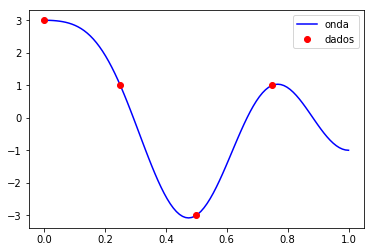

In [9]:
tp = np.array([0, 0.25, 0.5, 0.75])
yp = np.array([ 3, 1, -3, 1])
A = np.zeros((4, 4))
rhs = np.zeros(4)
for i in range(4):
    A[i] = np.cos(1 * np.pi * tp[i]), np.cos(2 * np.pi * tp[i]), \
           np.cos(3 * np.pi * tp[i]), np.cos(4 * np.pi * tp[i])  # Armazena uma linha de cada vez
    rhs[i] = yp[i]
sol = np.linalg.solve(A, rhs)
print('a,b,c,d: ',sol)

t = np.linspace(0, 1, 100)
y = sol[0] * np.cos(1 * np.pi * t) + sol[1] * np.cos(2 * np.pi * t) + \
    sol[2] * np.cos(3 * np.pi * t) + sol[3] * np.cos(4 * np.pi * t)
plt.plot(t, y, 'b', label='onda')
plt.plot(tp, yp, 'ro', label='dados')
plt.legend(loc='best');

<a href="#back1">Voltar ao Exercício 1</a>

<a name="ex2answer">Soluções do Exercício 2</a>

In [10]:
def fpoly(x, N):
    rv = np.zeros(N + 1)
    for n in range(N + 1):
        rv[n] = x ** n
    return rv

print(fpoly(2, 4))

[  1.   2.   4.   8.  16.]


<a href="#back2">Voltar ao Exercício 2</a>

<a name="ex3answer">Soluções do Exercício 3</a>

In [11]:
def solvepoly(x, y):
    N = len(x) - 1
    mat = np.zeros((N+1, N+1))
    for n in range(N+1):
        mat[n] = fpoly(x[n], N)
    par = np.linalg.solve(mat, y)
    return par
    
xp = np.array([0, 1, 2, 3])
yp = np.array([3, 1, -3, 1])
a = solvepoly(xp, yp)
print(a)

[ 3.          2.33333333 -6.          1.66666667]


<a href="#back3">Voltar ao Exercício 3</a>

<a name="ex4answer">Soluções do Exercício 4</a>

In [12]:
def fpolyeval(x, a):
    rv = np.zeros(len(x))
    for n in range(len(a)):
        rv += a[n] * x ** n
    return rv

print(fpolyeval(xp, a))

[ 3.  1. -3.  1.]


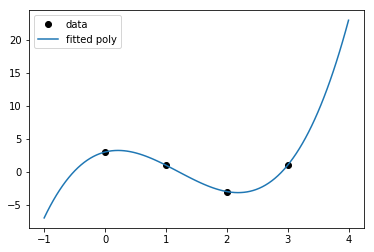

In [13]:
x = np.linspace(-1,4,100)
y = fpolyeval(x, a)
plt.plot(xp, yp, 'ko', label='data')
plt.plot(x, y, label='fitted poly')
plt.legend(loc='best');

<a href="#back4">Voltar ao Exercício 4</a>

<a name="ex5answer">Soluções do Exercício 5</a>

valor máximo head  22.45


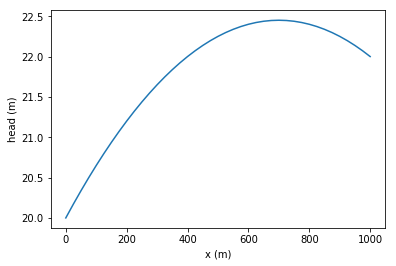

In [14]:
k = 10
D = 10
h1star = 20
h2star = 22
L = 1000
P = 0.001
N = 40

d0 = -2 * np.ones(N + 1)  # diagonal principal
d0[0] = 1  # o primeiro valor da diagonal principal é 1
d0[-1] = 1 # o último valor da diagonal principal é 1
dplus1 = np.ones(N) # diagonal imediatamente acima da diagonal principal, posição 1
dplus1[0] = 0    # o primeiro valor da diagonal é 0
dmin1 = np.ones(N)  # diagonal imediatamente abaixo da diagonal principal, posição -1
dmin1[-1] = 0    # o último valor da diagonal é 0
A = np.diag(d0, 0) + np.diag(dplus1, 1) + np.diag(dmin1, -1)
# Lado direito
delx = L / N
rhs = -P * delx ** 2 / (k * D) * np.ones(N + 1)
rhs[0] = h1star
rhs[-1] = h2star
# Resolve para a cabeça e faz a representação gráfica
h = np.linalg.solve(A, rhs)
x = np.linspace(0, L, N + 1)
plt.plot(x, h)
plt.xlabel('x (m)')
plt.ylabel('head (m)')
print('valor máximo head ', np.max(h))

<a href="#back5">Voltar ao Exercício 5</a>

<a name="ex6answer">Soluções do Exercício 6</a>

valor máximo depois de 10 intervalos de tempo é: 0.942582661527
valor máximo depois de 20 intervalos de tempo é: 0.774232516343
valor máximo depois de 30 intervalos de tempo é: 0.611765747348
valor máximo depois de 40 intervalos de tempo é: 0.480122757381
valor máximo depois de 50 intervalos de tempo é: 0.376368780322


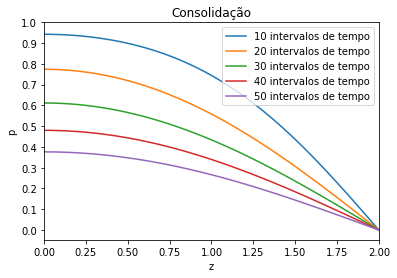

In [15]:
cv = 1e-6  # m^2/s
h = 2  # m
N = 40
delt = 4e4  # segundos
#
delz = h / N
mu = delz ** 2 / (cv * delt)

d0 = -(2 + mu) * np.ones(N + 1)
d0[-1] = 1
dp1 = np.ones(N)
dp1[0] = 2
dm1 = np.ones(N)
dm1[-1] = 0
A = np.diag(d0) + np.diag(dp1, 1) + np.diag(dm1, -1)

p = np.ones(N + 1)
for i in range(5):
    for j in range(10):
        rhs = -mu * p
        rhs[-1] = 0
        p = np.linalg.solve(A, rhs)
    plt.plot(np.arange(0, h + 0.01, delz), p, label=str((i + 1) * 10) + ' intervalos de tempo')
    print('valor máximo depois de', 10 * ( i + 1), 'intervalos de tempo é:', p[0])
plt.xlim(0, 2)
plt.legend(loc='best')
plt.xlabel('z')
plt.ylabel('p')
plt.yticks(np.linspace(0, 1, 11))
plt.title('Consolidação');

<a href="#back6">Voltar ao Exercício 6</a>

<a name="ex7answer">Soluções do Exercício 7</a>

valor máximo depois de 10 intervalos de tempo é: 0.942582661527
valor máximo depois de 20 intervalos de tempo é: 0.774232516343
valor máximo depois de 30 intervalos de tempo é: 0.611765747348
valor máximo depois de 40 intervalos de tempo é: 0.480122757381
valor máximo depois de 50 intervalos de tempo é: 0.376368780322


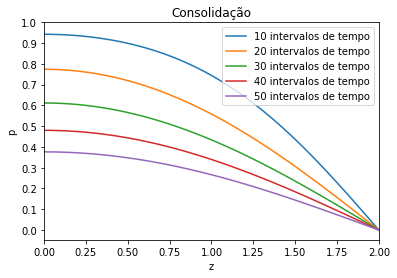

In [16]:
cv = 1e-6  # m^2/s
h = 2  # m
N = 40
delt = 4e4  # segundos
#
delz = h / N
mu = delz ** 2 / (cv * delt)

d0 = -(2 + mu) * np.ones(N + 1)
d0[-1] = 1
dp1 = np.ones(N)
dp1[0] = 2
dm1 = np.ones(N)
dm1[-1] = 0
A = np.diag(d0) + np.diag(dp1, 1) + np.diag(dm1, -1)
Ainv = np.linalg.inv(A)

p = np.ones(N + 1)
for i in range(5):
    for j in range(10):
        rhs = -mu * p
        rhs[-1] = 0
        p = Ainv @ rhs
    plt.plot(np.arange(0, h + 0.01, delz), p, label=str((i + 1) * 10) + ' intervalos de tempo')
    print('valor máximo depois de', 10 * ( i + 1), 'intervalos de tempo é:', p[0])
plt.xlim(0, 2)
plt.legend(loc='best')
plt.xlabel('z')
plt.ylabel('p')
plt.yticks(np.linspace(0, 1, 11))
plt.title('Consolidação');

<a href="#back7">Voltar ao Exercício 7</a>

<a name="ex8answer">Soluções do Exercício 8</a>

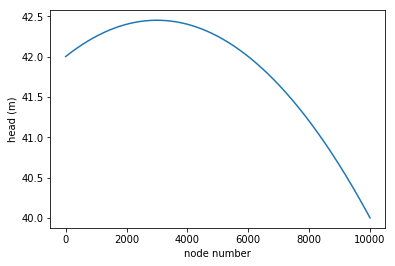

In [17]:
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve 
k = 10
D = 10
h1star = 42
h2star = 40
L = 1000
P = 0.001
N = 10000
d0 = -2 * np.ones(N + 1)  # diagonal principal
d0[0] = 1  # o primeiro valor da diagonal principal é 1
d0[-1] = 1 # o último valor da diagonal principal é 1
dplus1 = np.ones(N) # diagonal imediatamente acima da diagonal principal, posição 1
dplus1[0] = 0    # o primeiro valor da diagonal é 0
dmin1 = np.ones(N)  # diagonal imediatamente abaixo da diagonal principal, posição -1
dmin1[-1] = 0    # o último valor da diagonal é 0
A = diags([dmin1, d0, dplus1], [-1, 0, 1], format='csc')
# Lado direito
delx = L / N
rhs = -P * delx ** 2 / (k * D) * np.ones(N + 1)
rhs[0] = h1star
rhs[-1] = h2star
h = spsolve(A, rhs)
plt.plot(h)
plt.xlabel('node number')
plt.ylabel('head (m)');

<a href="#back8">Voltar ao Exercício 8</a>

A obra "Notebook 6: Sistemas de equações lineares" é um derivado de [Notebook 6: Systems of linear equations](http://nbviewer.jupyter.org/github/mbakker7/exploratory_computing_with_python/blob/master/notebook6_linear_systems/py_exploratory_comp_6_sol.ipynb) de [mbakker7](https://github.com/mbakker7), sob a licença CC BY (4.0 Licença Internacional).
"Notebook 6: Sistemas de equações lineares" é publicado sob a licença CC BY (4.0 Licença Internacional) por Educa2030.